In [1]:
import numpy as np
n = 10
N = 1000
x = np.linspace(-3,3,n).reshape(n,1)
X = np.linspace(-4,4,N).reshape(N,1)
y = x+0.2*np.random.randn(n,1)#添加了误差项的线性模型
y[n-1]=-4
#设计矩阵
p = np.zeros((n,2))
p[:,0] = 1
for i in range(n):
    p[i,1] = x[i]
t = np.dot(np.linalg.pinv(p),y)#模型的参数

In [2]:
e=1#阈值
for o in range(1000):#更新参数
    r = abs(np.dot(p,t)-y)#残差的绝对值
    w = np.ones((n,1))#权重矩阵
    w[r>e] = e/r[r>e]
    t0 = np.dot(np.linalg.pinv((np.dot(p.T,np.multiply(np.tile(w,2),p)))),np.dot(p.T,np.multiply(w,y)))
    if np.linalg.norm(t-t0)<0.001:
        break
    t = t0

#设计矩阵，根据得到参数求得迭代加权最小二乘
P = np.zeros((N,2))
P[:,0] = 1
for i in range(N):
    P[i,1] = X[i]
F = np.dot(P,t)

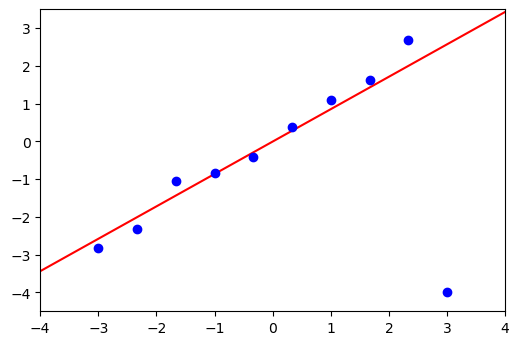

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4),dpi=100)
plt.axis([-4,4,-4.5,3.5])
plt.plot(X,F,'r-',x,y,'bo')

In [4]:
print('迭代次数：',o+1)
print('模型的最终参数',t)
print('拟合的线性模型为:y={}+{}x'.format(round(t[0][0],4),round(t[1][0],4)))

迭代次数： 5
模型的最终参数 [[-0.00342869]
 [ 0.85865519]]
拟合的线性模型为:y=-0.0034+0.8587x
